In [4]:
import requests

service_key = 'R+BEwJ49XVmTutdoCAdNq4m7wjOsdFNhVtlzkxWVeZJPhwQqWbGcD7CNeQPipFzIWAanQVw/rPLsGkfcYvD4AQ=='

url = 'http://apis.data.go.kr/B552584/MsrstnInfoInqireSvc/getMsrstnList'
params ={'serviceKey' : service_key, 'returnType' : 'json', 'numOfRows' : '500', 'pageNo' : '1'}

response = requests.get(url, params=params)
print(response.content)

b'{"response":{"body":{"totalCount":661,"items":[{"dmX":"35.274045","item":"O3, NO2, PM10, PM2.5","mangName":"\xeb\x8f\x84\xec\x8b\x9c\xeb\x8c\x80\xea\xb8\xb0","year":"1997","addr":"\xeb\xb6\x80\xec\x82\xb0 \xea\xb8\x88\xec\xa0\x95\xea\xb5\xac \xec\xb2\xad\xeb\xa3\xa1\xeb\xa1\x9c 25 \xec\xb2\xad\xeb\xa3\xa1\xeb\x85\xb8\xed\x8f\xac\xeb\x8f\x99\xec\xa3\xbc\xeb\xaf\xbc\xec\x84\xbc\xed\x84\xb0 \xec\x98\xa5\xec\x83\x81","stationName":"\xec\xb2\xad\xeb\xa3\xa1\xeb\x8f\x99","dmY":"129.090793"},{"dmX":"35.1708927","item":"SO2, CO, O3, NO2, PM10, PM2.5","mangName":"\xeb\x8f\x84\xec\x8b\x9c\xeb\x8c\x80\xea\xb8\xb0","year":"2005","addr":"\xeb\xb6\x80\xec\x82\xb0 \xed\x95\xb4\xec\x9a\xb4\xeb\x8c\x80\xea\xb5\xac \xec\x96\x91\xec\x9a\xb4\xeb\xa1\x9c 91 \xec\xa2\x8c1\xeb\x8f\x99\xec\xa3\xbc\xeb\xaf\xbc\xec\x84\xbc\xed\x84\xb0 \xec\x98\xa5\xec\x83\x81","stationName":"\xec\xa2\x8c\xeb\x8f\x99","dmY":"129.1741659"},{"dmX":"35.182668","item":"SO2, CO, O3, NO2, PM10, PM2.5","mangName":"\xeb\x8f\x84\xec\x8

In [5]:
# binary format -> text format 변환
decoded_response_content = response.content.decode('utf-8')
decoded_response_content

'{"response":{"body":{"totalCount":661,"items":[{"dmX":"35.274045","item":"O3, NO2, PM10, PM2.5","mangName":"도시대기","year":"1997","addr":"부산 금정구 청룡로 25 청룡노포동주민센터 옥상","stationName":"청룡동","dmY":"129.090793"},{"dmX":"35.1708927","item":"SO2, CO, O3, NO2, PM10, PM2.5","mangName":"도시대기","year":"2005","addr":"부산 해운대구 양운로 91 좌1동주민센터 옥상","stationName":"좌동","dmY":"129.1741659"},{"dmX":"35.182668","item":"SO2, CO, O3, NO2, PM10, PM2.5","mangName":"도시대기","year":"2019","addr":"부산광역시 해운대구 센텀동로 191 동부하수처리장 (재송동)","stationName":"재송동","dmY":"129.118136"},{"dmX":"35.08298","item":"SO2, CO, O3, NO2, PM10, PM2.5","mangName":"도시대기","year":"1979","addr":"부산 사하구 장림로 161번길 2 장림1동주민센터 옥상","stationName":"장림동","dmY":"128.9667622"},{"dmX":"35.20958","item":"SO2, CO, O3, NO2, PM10, PM2.5","mangName":"도시대기","year":"1999","addr":"부산광역시 강서구 체육공원로 43 강서체육공원 (대저1동)","stationName":"대저동","dmY":"128.9713671"},{"dmX":"35.0866322","item":"SO2, CO, O3, NO2, PM10, PM2.5","mangName":"도시대기","year":"2003","addr":"부산 강서구 녹산산단 382

In [ ]:
import json

# json string -> dict 변환
dict_content = json.loads(decoded_response_content)
dict_content

In [ ]:
dict_content['response']['body']['items']

In [11]:
import pandas as pd

df_content = pd.DataFrame(dict_content['response']['body']['items'])
print( df_content.columns )
df_content[['stationName', 'addr']]

Index(['dmX', 'item', 'mangName', 'year', 'addr', 'stationName', 'dmY'], dtype='object')


,stationName,addr
0,청룡동,부산 금정구 청룡로 25 청룡노포동주민센터 옥상
1,좌동,부산 해운대구 양운로 91 좌1동주민센터 옥상
2,재송동,부산광역시 해운대구 센텀동로 191 동부하수처리장 (재송동)
3,장림동,부산 사하구 장림로 161번길 2 장림1동주민센터 옥상
4,대저동,부산광역시 강서구 체육공원로 43 강서체육공원 (대저1동)
...,...,...
495,석모리,인천 강화군 삼산면 석모리 347-4(해병 1935부대)
496,덕적도,인천 옹진군 덕적면 진리 산 35-4번지
497,백령도,인천 옹진군 백령면 연화리 산241-2
498,영흥,인천광역시 옹진군 영흥면 영흥로251번길 90 영흥 면사무소 2층 옥상 (영흥면사무소)


#### 일자별 미세먼지 (PM10 or PM25) 데이터 조회 및 시각화
#### 일정 기간의 미세먼지 데이터 조회해서 선그래프로 표시

In [45]:
import requests

service_key = 'R+BEwJ49XVmTutdoCAdNq4m7wjOsdFNhVtlzkxWVeZJPhwQqWbGcD7CNeQPipFzIWAanQVw/rPLsGkfcYvD4AQ=='

url = 'http://apis.data.go.kr/B552584/ArpltnStatsSvc/getMsrstnAcctoRDyrg'
params ={'serviceKey' : service_key, 'returnType' : 'json', 'numOfRows' : '500', 'pageNo' : '1', 'inqBginDt': '20240101', 'inqEndDt': '20241022', 'msrstnName':'좌동'}

response = requests.get(url, params=params)
print(response.content)

b'{"response":{"body":{"totalCount":175,"items":[{"msurDt":"2024-05-01","so2Value":".003","coValue":".2","msrstnName":"\xec\xa2\x8c\xeb\x8f\x99","pm10Value":"27","no2Value":".004","o3Value":".049","pm25Value":"11"},{"msurDt":"2024-05-02","so2Value":".003","coValue":".2","msrstnName":"\xec\xa2\x8c\xeb\x8f\x99","pm10Value":"22","no2Value":".005","o3Value":".045","pm25Value":"10"},{"msurDt":"2024-05-03","so2Value":".002","coValue":".3","msrstnName":"\xec\xa2\x8c\xeb\x8f\x99","pm10Value":"21","no2Value":".007","o3Value":".033","pm25Value":"7"},{"msurDt":"2024-05-04","so2Value":".003","coValue":".3","msrstnName":"\xec\xa2\x8c\xeb\x8f\x99","pm10Value":"27","no2Value":".006","o3Value":".039","pm25Value":"14"},{"msurDt":"2024-05-05","so2Value":".002","coValue":".2","msrstnName":"\xec\xa2\x8c\xeb\x8f\x99","pm10Value":"23","no2Value":".005","o3Value":".038","pm25Value":"9"},{"msurDt":"2024-05-06","so2Value":".002","coValue":".3","msrstnName":"\xec\xa2\x8c\xeb\x8f\x99","pm10Value":"27","no2Value"

In [46]:
# binary format -> text format 변환
decoded_response_content = response.content.decode('utf-8')
decoded_response_content

'{"response":{"body":{"totalCount":175,"items":[{"msurDt":"2024-05-01","so2Value":".003","coValue":".2","msrstnName":"좌동","pm10Value":"27","no2Value":".004","o3Value":".049","pm25Value":"11"},{"msurDt":"2024-05-02","so2Value":".003","coValue":".2","msrstnName":"좌동","pm10Value":"22","no2Value":".005","o3Value":".045","pm25Value":"10"},{"msurDt":"2024-05-03","so2Value":".002","coValue":".3","msrstnName":"좌동","pm10Value":"21","no2Value":".007","o3Value":".033","pm25Value":"7"},{"msurDt":"2024-05-04","so2Value":".003","coValue":".3","msrstnName":"좌동","pm10Value":"27","no2Value":".006","o3Value":".039","pm25Value":"14"},{"msurDt":"2024-05-05","so2Value":".002","coValue":".2","msrstnName":"좌동","pm10Value":"23","no2Value":".005","o3Value":".038","pm25Value":"9"},{"msurDt":"2024-05-06","so2Value":".002","coValue":".3","msrstnName":"좌동","pm10Value":"27","no2Value":".004","o3Value":".049","pm25Value":"10"},{"msurDt":"2024-05-07","so2Value":".002","coValue":".3","msrstnName":"좌동","pm10Value":"28"

In [47]:
import json

# json string -> dict 변환
dict_content = json.loads(decoded_response_content)
dict_content

{'response': {'body': {'totalCount': 175,
   'items': [{'msurDt': '2024-05-01',
     'so2Value': '.003',
     'coValue': '.2',
     'msrstnName': '좌동',
     'pm10Value': '27',
     'no2Value': '.004',
     'o3Value': '.049',
     'pm25Value': '11'},
    {'msurDt': '2024-05-02',
     'so2Value': '.003',
     'coValue': '.2',
     'msrstnName': '좌동',
     'pm10Value': '22',
     'no2Value': '.005',
     'o3Value': '.045',
     'pm25Value': '10'},
    {'msurDt': '2024-05-03',
     'so2Value': '.002',
     'coValue': '.3',
     'msrstnName': '좌동',
     'pm10Value': '21',
     'no2Value': '.007',
     'o3Value': '.033',
     'pm25Value': '7'},
    {'msurDt': '2024-05-04',
     'so2Value': '.003',
     'coValue': '.3',
     'msrstnName': '좌동',
     'pm10Value': '27',
     'no2Value': '.006',
     'o3Value': '.039',
     'pm25Value': '14'},
    {'msurDt': '2024-05-05',
     'so2Value': '.002',
     'coValue': '.2',
     'msrstnName': '좌동',
     'pm10Value': '23',
     'no2Value': '.005',
    

In [48]:
import pandas as pd

df_content = pd.DataFrame(dict_content['response']['body']['items'])
print( df_content.columns )

Index(['msurDt', 'so2Value', 'coValue', 'msrstnName', 'pm10Value', 'no2Value',
       'o3Value', 'pm25Value'],
      dtype='object')


In [49]:
df_pm_content = df_content[['msurDt', "pm10Value", "pm25Value"]]
print( df_pm_content.shape )
df_pm_content.head(3)

(175, 3)


,msurDt,pm10Value,pm25Value
0,2024-05-01,27,11
1,2024-05-02,22,10
2,2024-05-03,21,7


In [52]:
print( df_pm_content.isna().sum() ) # missing value check
# print( ~df_pm_content['pm25Value'].isna()) # missing value 가 아닌 값은 True 아니면 False
df_pm_valid_content = df_pm_content[~df_pm_content['pm25Value'].isna()]
df_pm_valid_content = df_pm_valid_content[~df_pm_valid_content['pm10Value'].isna()]
print( df_pm_valid_content.isna().sum() )

msurDt       0
pm10Value    1
pm25Value    0
dtype: int64
msurDt       0
pm10Value    0
pm25Value    0
dtype: int64


In [53]:
df_pm_valid_content['pm10Value'] = df_pm_valid_content['pm10Value'].map(lambda v: float(v))
df_pm_valid_content['pm25Value'] = df_pm_valid_content['pm25Value'].map(lambda v: float(v))

C:\Users\human\AppData\Local\Temp\ipykernel_1276\1853798498.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pm_valid_content['pm10Value'] = df_pm_valid_content['pm10Value'].map(lambda v: float(v))
C:\Users\human\AppData\Local\Temp\ipykernel_1276\1853798498.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pm_valid_content['pm25Value'] = df_pm_valid_content['pm25Value'].map(lambda v: float(v))


In [54]:
df_pm_valid_content.info()

<class 'pandas.core.frame.DataFrame'>
Index: 174 entries, 0 to 174
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   msurDt     174 non-null    object 
 1   pm10Value  174 non-null    float64
 2   pm25Value  174 non-null    float64
dtypes: float64(2), object(1)
memory usage: 5.4+ KB


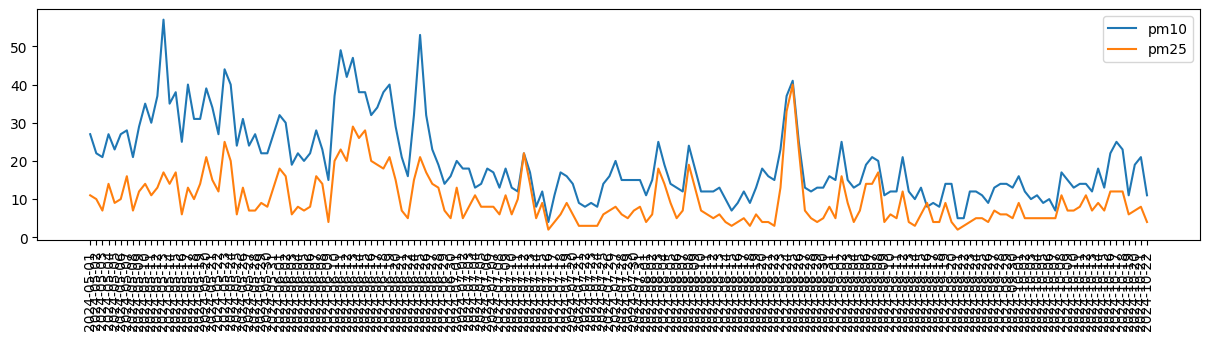

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 3))
plt.plot(df_pm_valid_content['msurDt'], df_pm_valid_content['pm10Value'], label='pm10')
plt.plot(df_pm_valid_content['msurDt'], df_pm_valid_content['pm25Value'], label='pm25')
plt.xticks(rotation=90)
plt.legend()
plt.show()